# INTRODUCTION

This case study is aimed to understand the traffic source of our e-commerce. The **6 steps of Data Analysis** is used to present this analysis.


Title: **Source/Medium e-commerce performance**

Author: GreyHub

Date: 2 October 2023

***


# STEP 1: ASK

#### 1.0 Background

Pet.Co (invented) is one of the main petfood producer in the petfood industry. Its products vary from a wide range of dog and cat food. The main objective of the company is to manufacture and distribute only high quality products. The company has a wide range of local distribution and they have launched a new ecommerce to explore the internet distribution 

#### 1.2 Business Task:

```
Analyze the main source of traffic and see what are the most profitable in terms of sales and time spend on page in order also to see what drives quality traffic
```


#### 1.3 Business Objectives:  
1. What are the trends identified?
2. How could these trends apply to our ecommerce?
3. How could these trends help influence the Pet.co marketing strategy?



#### 1.4 Deliverables:
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of analysis
5. Supporting visualizations and key findings
6. High-level content recommendations based on the analysis


#### 1.5 Key Stakeholders:
1. Pet.Co Marketing managers 
2. Media agencies
3. Media team 


***


# STEP 2: PREPARE


#### 2.1 Information on Data Source:
1. The data has been downloaded from Google Analytics Universal with a time range from 1st of Jannuary 2022 till 31st of May 2022 in a excel spreadsheet. 
2. The data conains the different source and medium traffic to the website. The main metrics are Session, Clicks, Revenues and Bounce Rate

    
#### 2.2 Limitations of Data Set:
1. Data collected using a cookie based solution such as Google Universal Analytics. The problem with cookie based solutions is that we do not have a clear picture or the real world data, this includes people who opted out to being tracked as well as users that cleared the chache and are counted as new users again.
2. This sample size is a small picture of the complex world of source and medium traffic and it represents only two quarters of our year. 




# STEP 3: PROCESS

We are using Python to prepare and process the data.


#### 3.1 Preparing the Environment

The ```numPy, pandas, matplotlib, datetime, ipywidget, plotly``` packages are installed and aliased for easy reading.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import ipywidgets as widgets
from ipywidgets import interactive, Output, VBox, Label, interact
from itertools import combinations

from sklearn.linear_model import LinearRegression

#### 3.2 Importing data set

In [2]:
traffic = pd.read_excel('/Users/hexell/Desktop/source_medium analysis.xlsx')

#### 3.3 Data cleaning and manipulation

##### Steps

1. Observe and familiarize with data

2. Check for null or missing values

3. Perform sanity check of data

Display the first 5 rows of data to have a quick look at our data frame

In [3]:
traffic.head()

,Date,Source / Medium,Users,Unique Purchases,Sessions,Clicks,Product List Clicks,Bounce Rate,Revenue
0,2022-05-31,pet.co.it / referral,2,0,3,0,0,0.000000,0.0
1,2022-05-31,inbrowserapp.com / referral,7,0,7,0,0,0.428571,0.0
2,2022-05-31,pet.co / referral,8,0,16,0,0,0.312500,0.0
3,2022-05-31,baidu / organic,1,0,1,0,0,1.000000,0.0
4,2022-05-31,dog.com_editorial / article,18,0,18,0,0,0.666667,0.0


Checking for missing values in our data frame

In [4]:
traffic.isnull().sum()

Date                   0
Source / Medium        0
Users                  0
Unique Purchases       0
Sessions               0
Clicks                 0
Product List Clicks    0
Bounce Rate            4
Revenue                0
dtype: int64

There are 4 null values in our dataframe that we can remove without any problem.

Finding out the basic information of our data frame:
* no. of rows and columns
* name of columns
* type of value

In [5]:
# Removing null values in our data frame

traffic.dropna(inplace=True)

In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6978 entries, 0 to 6981
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 6978 non-null   datetime64[ns]
 1   Source / Medium      6978 non-null   object        
 2   Users                6978 non-null   int64         
 3   Unique Purchases     6978 non-null   int64         
 4   Sessions             6978 non-null   int64         
 5   Clicks               6978 non-null   int64         
 6   Product List Clicks  6978 non-null   int64         
 7   Bounce Rate          6978 non-null   float64       
 8   Revenue              6978 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 545.2+ KB


So far we can conclude: 

1. There is no typo, Null or missing values.

2. Data frame has 6978 rows and 9 columns. 


The following data manipulation is performed:


1. Create new column *Weekday* by separating the date into day of the week for further analysis.

2. Create new column *Month* by converting new column in #4 to number of hours.

3. Create a new column called *ConversionRate* that represents how many clics lead to a conversion (conversions/clicks)

4. Rearrange and rename columns.

In [7]:
# creating day and month column 

traffic['Weekday'] = traffic['Date'].dt.strftime('%A')
traffic['Month'] = traffic['Date'].dt.strftime('%B')
traffic.head()

,Date,Source / Medium,Users,Unique Purchases,Sessions,Clicks,Product List Clicks,Bounce Rate,Revenue,Weekday,Month
0,2022-05-31,pet.co.it / referral,2,0,3,0,0,0.000000,0.0,Tuesday,May
1,2022-05-31,inbrowserapp.com / referral,7,0,7,0,0,0.428571,0.0,Tuesday,May
2,2022-05-31,pet.co / referral,8,0,16,0,0,0.312500,0.0,Tuesday,May
3,2022-05-31,baidu / organic,1,0,1,0,0,1.000000,0.0,Tuesday,May
4,2022-05-31,dog.com_editorial / article,18,0,18,0,0,0.666667,0.0,Tuesday,May


In [8]:
# Creating the 'Conversion Rate' column 
traffic['Conversion Rate'] = ((traffic['Revenue'] / traffic['Sessions'])).fillna(0)

# Calculating bounces
traffic['Bounces'] = (traffic['Bounce Rate'] * traffic['Sessions']).fillna(0)

traffic.head()

,Date,Source / Medium,Users,Unique Purchases,Sessions,Clicks,Product List Clicks,Bounce Rate,Revenue,Weekday,Month,Conversion Rate,Bounces
0,2022-05-31,pet.co.it / referral,2,0,3,0,0,0.000000,0.0,Tuesday,May,0.0,0.0
1,2022-05-31,inbrowserapp.com / referral,7,0,7,0,0,0.428571,0.0,Tuesday,May,0.0,3.0
2,2022-05-31,pet.co / referral,8,0,16,0,0,0.312500,0.0,Tuesday,May,0.0,5.0
3,2022-05-31,baidu / organic,1,0,1,0,0,1.000000,0.0,Tuesday,May,0.0,1.0
4,2022-05-31,dog.com_editorial / article,18,0,18,0,0,0.666667,0.0,Tuesday,May,0.0,12.0


In [9]:
#rearrange the list of columns 
new_cols = ['Date', 'Weekday', 'Month', 'Source / Medium', 'Unique Purchases', 'Sessions', 'Clicks',
       'Product List Clicks', 'Bounce Rate', 'Revenue', 'Conversion Rate', 'Bounces']

# reindex function to rearrange columns based on "new_cols"
traffic = traffic.reindex(columns=new_cols)

# print 1st 5 rows to confirm
traffic.head(5)

,Date,Weekday,Month,Source / Medium,Unique Purchases,Sessions,Clicks,Product List Clicks,Bounce Rate,Revenue,Conversion Rate,Bounces
0,2022-05-31,Tuesday,May,pet.co.it / referral,0,3,0,0,0.000000,0.0,0.0,0.0
1,2022-05-31,Tuesday,May,inbrowserapp.com / referral,0,7,0,0,0.428571,0.0,0.0,3.0
2,2022-05-31,Tuesday,May,pet.co / referral,0,16,0,0,0.312500,0.0,0.0,5.0
3,2022-05-31,Tuesday,May,baidu / organic,0,1,0,0,1.000000,0.0,0.0,1.0
4,2022-05-31,Tuesday,May,dog.com_editorial / article,0,18,0,0,0.666667,0.0,0.0,12.0


Data cleaning and manipulation is completed. Hence, data is now ready to be analysed. 

***

# STEP 4: ANALYZE

#### 4.1 Perform calculations

Pulling the statistics of df_activity for analysis:
* count - no. of rows
* mean (average)
* std (standard deviation)
* min and max
* percentiles 25%, 50%, 75%
* analysis of the correlation between variables


In [10]:
traffic.describe()

,Unique Purchases,Sessions,Clicks,Product List Clicks,Bounce Rate,Revenue,Conversion Rate,Bounces
count,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000
mean,2.728862,91.291058,35.608054,2.925337,0.477574,46.275267,1.537100,58.909860
std,9.621272,329.878885,444.492520,10.876139,0.401217,164.335020,7.798548,237.014388
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.000000
75%,0.000000,17.000000,0.000000,0.000000,0.897674,0.000000,0.000000,8.000000
max,120.000000,4598.000000,12195.000000,154.000000,1.000000,2203.740000,134.680000,2004.000000


1. Analyzing the statistics of the datafram we see that there are a lot of outlayers in our space especially for the `Unique Purchases` value, this means that there could be a day or period where there was a huge investment in a single channel that could lead to an increase in the purchases. This is also the reflection on the `Sessions`, `Clicks` and `Revenue` valriables since they could be correlated.

2. However on average our ecommerce makes almost 3 purchaes with 46$ in Revenues 

### Visualization and Findings

MOVING AVERAGE EACH WEEK

In [11]:
#traffic['Date'] = pd.to_datetime(traffic['Date'])

# Set the 'Date' column as the index
weekly_traffic = traffic.set_index('Date', inplace=True)

# Group the DataFrame by week and sum the revenues
weekly_sum = traffic.resample('W').sum()

# Calculate the rolling mean for the sum of revenues
rolling_mean = weekly_sum['Revenue'].rolling(window=4).mean()  # Adjust the window size as needed

# Add the rolling mean to the DataFrame
weekly_sum['Rolling Mean'] = rolling_mean

# Display only the 'Date' and 'Rolling Mean' columns
rolling_average = weekly_sum[['Rolling Mean']]

In [12]:
rolling_average.head(10)

,Rolling Mean
Date,
2022-01-02,NaN
2022-01-09,NaN
2022-01-16,NaN
2022-01-23,14323.7850
2022-01-30,18778.6625
2022-02-06,17603.1850
2022-02-13,17066.1350
2022-02-20,14811.5925
2022-02-27,13485.2425


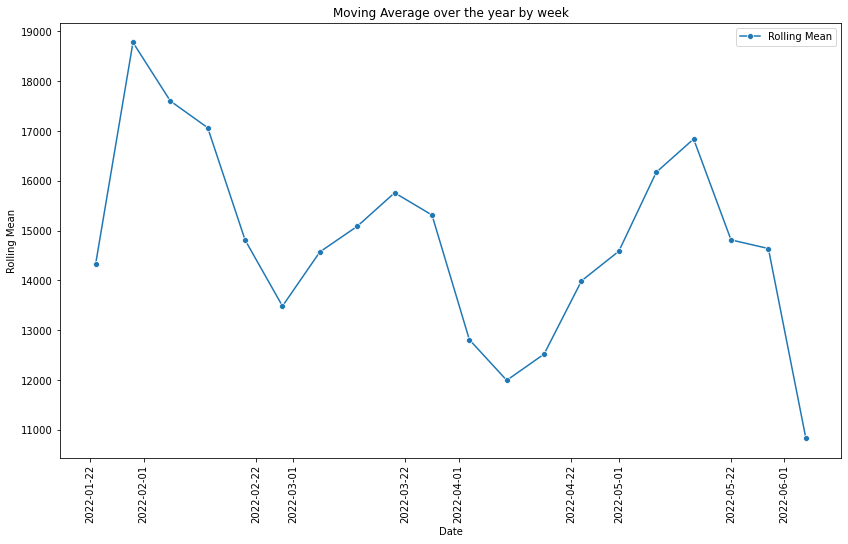

In [13]:
plt.figure(figsize=(14,8))
sns.lineplot(x='Date', y='Rolling Mean', data=rolling_average, marker='o', label='Rolling Mean')
plt.title('Moving Average over the year by week')
plt.xticks(rotation=90)
plt.show()

##### **Rolling Average for the Revenues**

In this lineplot, we want to have a first look at the moving average for the revenues in our data frame. 

1. We can see that it follows a cycle with peacks and downtrends but in general we can see there is a downward trend. 

2. These ups and downs may be related to the product seasonality we are offering and on the budget we spend on these channels. Furthermore we can see that in Jannuary we have the highest median value whith a second intermediate peack in March and in the end in May.

3. We can use this graph to analyze why we have the lowest peacks in mid April and beginning of March; perhaps we can focus on more promotions during these periods or increase marketing spend for that specific time

In [14]:
# check what are the most performing months

month_perf = traffic.groupby('Month')['Revenue', 'Clicks'].sum().reset_index().sort_values(by='Month', ascending=True)
month_perf.head(10)

,Month,Revenue,Clicks
0,April,60259.91,16175
1,February,53694.92,17777
2,January,81036.29,20038
3,March,65552.73,16487
4,May,62364.96,177996


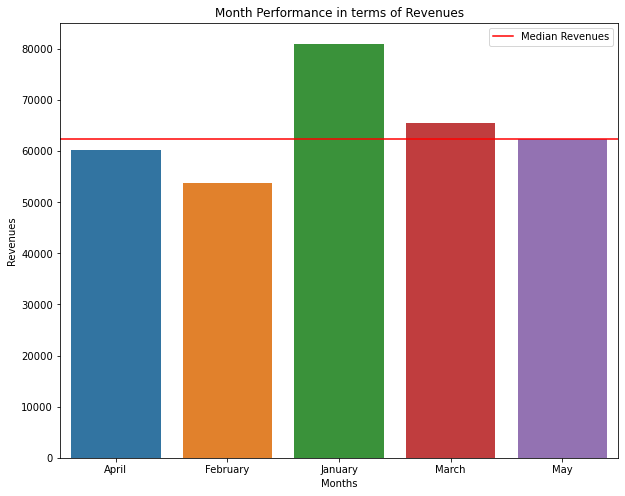

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x='Month', y='Revenue', data=month_perf)
plt.title('Month Performance in terms of Revenues')
plt.xlabel('Months')
plt.ylabel('Revenues')

median_revenues = month_perf.Revenue.median()
plt.axhline(median_revenues, color = 'Red', label = 'Median Revenues')

plt.legend()
plt.show()

##### **Revenues amount across the months**

In this barchart, we are looking at the amount of revenues generated by the traffic sources in the e-commerce during the 5 months of our analysis. 

1. We discovered that the most profitable month in terms of revenues is January, probably because it's the period where people buy stuff for the festivities. 

2. We also plot the median value and we noted that after the month of January, the following month is under the median line but there is a sort of thrend where there is an increase in revenues in March and then a drop in April with a subsequent rise in May.

In [16]:
# checking what are the most 5 profitable traffic source in terms of revenues 

traffic_perf = traffic.groupby('Source / Medium').agg({'Sessions':'sum', 'Revenue':'sum', 'Conversion Rate': 'mean'}).reset_index().sort_values(by='Revenue', ascending=False).round(2)
traffic_perf.head()

,Source / Medium,Sessions,Revenue,Conversion Rate
150,google / organic,301160,92510.94,0.31
263,sfmc / email,31682,64387.35,2.44
149,google / cpc,86472,56267.41,0.69
0,(direct) / (none),42985,50515.55,1.22
241,puppy.com / referral,837,16892.02,13.63


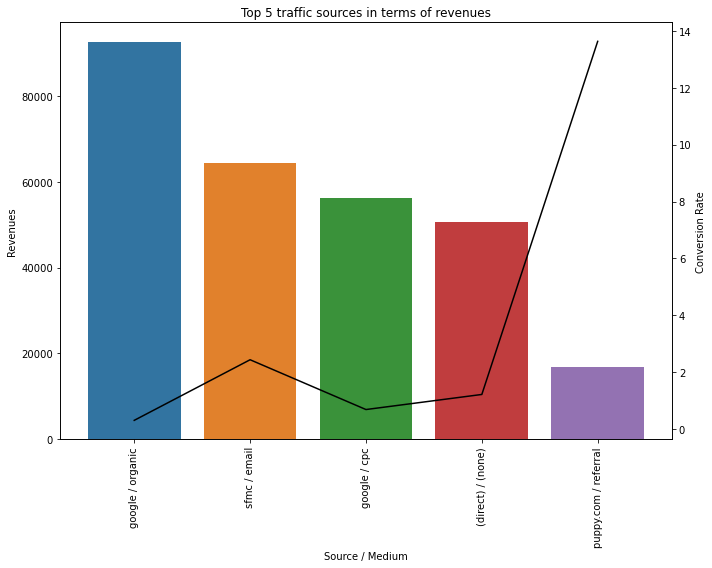

In [17]:
#Plotting combochart for Sessions and Avg. Session Duration

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 8))

# Plot the Source / Medium as bars using Seaborn
sns.barplot(x='Source / Medium', y='Revenue', data=traffic_perf.head(), ax=ax1)
ax1.set_ylabel('Revenues', color='black')
ax1.tick_params(axis='y', colors='black')
plt.xticks(rotation=90)

# Create a secondary axis for Avg. Session Duration and plot as a line using Seaborn
ax2 = ax1.twinx()
sns.lineplot(x='Source / Medium', y='Conversion Rate', data=traffic_perf.head(), ax=ax2, color='Black')
ax2.set_ylabel('Conversion Rate', color='black')
ax2.tick_params(axis='y', colors='black')

# Set plot title and adjust layout
plt.title('Top 5 traffic sources in terms of revenues')
plt.tight_layout()

# Show the combo chart
plt.show()

In [18]:
# Convert dates to numeric values for regression (e.g., days since the first date)
traffic.reset_index(inplace=True)
traffic['Days'] = (traffic['Date'] - traffic['Date'].min()).dt.days


In [19]:
# Create and fit a linear regression model
model = LinearRegression()
model.fit(traffic[['Days']], traffic['Revenue'])

# Generate predicted values from the model
traffic['Trendline'] = model.predict(traffic[['Days']])

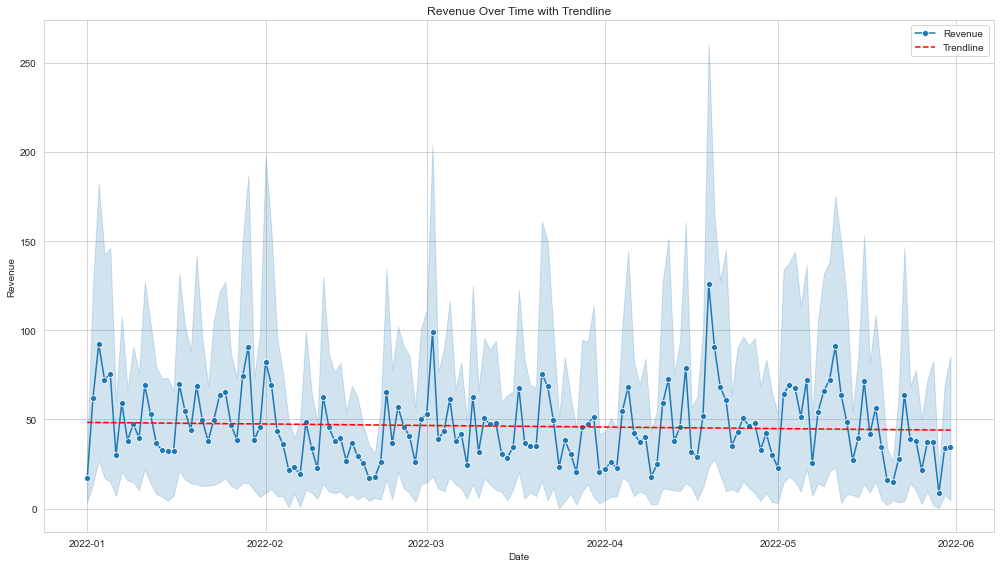

In [20]:
sns.set_style('whitegrid')

# Create the line plot with Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Revenue', data=traffic, label='Revenue', marker='o')
sns.lineplot(x='Date', y='Trendline', data=traffic, label='Trendline', linestyle='--', color='red')

# Customize labels and title
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Over Time with Trendline')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

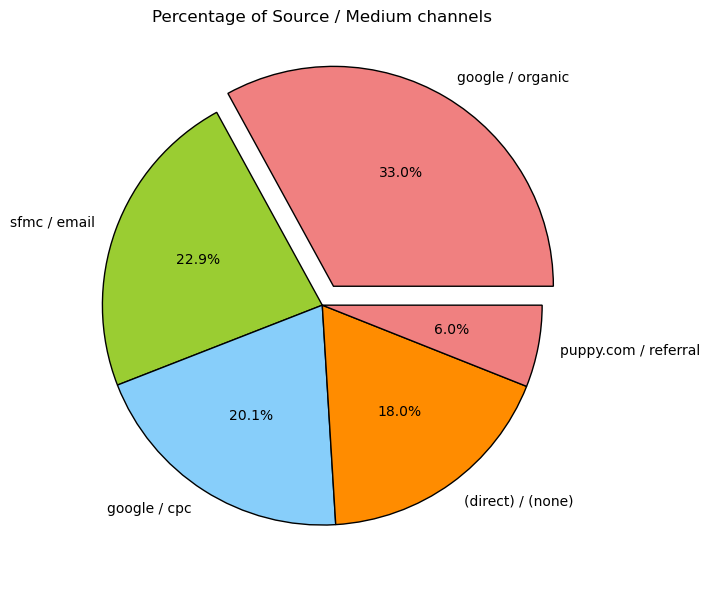

In [21]:
# Creating a dataframe indexed by 'Source / Medium'
traffic_perf2 = traffic.groupby('Source / Medium').agg({'Sessions':'sum', 'Revenue':'sum', 'Conversion Rate': 'mean'}).sort_values(by='Revenue', ascending=False).round(2)

# Explode a slice (e.g., the one with the maximum results)
max_results_index = traffic_perf2.Revenue.head().idxmax()
explode = [0.1 if obj == max_results_index else 0 for obj in traffic_perf2.head().index]

# Plotting the pie chart
plt.style.use("default")
plt.figure(figsize=(8, 6))
plt.pie(traffic_perf2.Revenue.head(), labels=traffic_perf2.head().index,
        colors=["lightcoral", "yellowgreen", "lightskyblue", "darkorange"],
        wedgeprops={"edgecolor": "black"},
        autopct="%1.1f%%", explode=explode)
plt.title("Percentage of Source / Medium channels")
plt.tight_layout()
plt.show()

##### **Top 5 Source/Medium in terms of revenues**

From the barchart above, we can see that: 

1. The organic traffic from Google is the most profitable, this means that we are currently doing well on SEO efforts and this channel accounts the 33% of our total traffic. However the conversion rate is the lowest compared to our channel and this means that we bring a lot of traffic but the one that converts is a small fraction. 

2. Email marketing is the second most driver of revenues in our e-commerce, with a 22.9%. It also has a good conversion rate and this means that producign quality content through email marketing is a valuable asset.

3. The third most important source of revenues is the Google CPC. This accounts all the campaigns (search and display) that we make, here is important to understand what are the costs and the ROAS of our campaigns in order to see if they are profitable or not.

4. Last but not least the direct traffic. These could be our returning users or users that saw an ad on social and that are interested in our products. It's important to keep an eye on this traffic since could be an indicator of profitable and loyal customers

5. We can see there is a small decrease on the general trend. Our ecommece is loosing revenues over time and we need to investigate further.


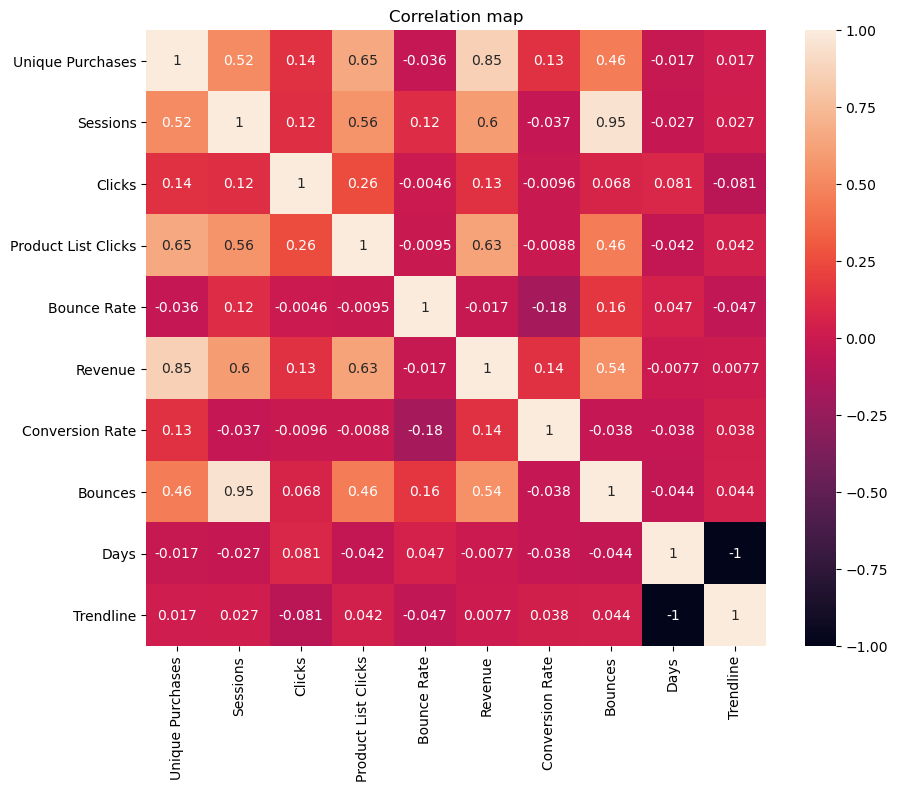

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(traffic.corr(), annot=True)
plt.title('Correlation map')
plt.show()

In [23]:
# Define a dropdown widget for selecting the 'Objective'
objective_dropdown = widgets.Dropdown(
    options=traffic_perf['Source / Medium'].head(10).unique(),
    description='Select Source / Medium:',
)

# Define a function to update the scatter plot based on the selected 'Objective'
def update_scatter_plot(selected_objective):
    filtered_data = traffic[traffic['Source / Medium'] == selected_objective]

    plt.style.use("default")
    plt.figure(figsize=(8, 6))  # specify the size of the chart
    plt.scatter(x='Sessions', y='Revenue',
                alpha=0.8, c='Sessions', data=filtered_data,
                cmap="Spectral")

    # add annotations and visuals
    median_sessions = filtered_data['Sessions'].median()
    median_revenues = filtered_data['Revenue'].median()

    plt.colorbar(orientation="vertical")
    plt.axvline(median_sessions, color="Blue", label="Median Sessions")
    plt.axhline(median_revenues, color="Red", label="Median Revenues")
    plt.xlabel("Sessions")
    plt.ylabel("Revenues")
    plt.title(f"Sessions vs. Revenues for Source / Medium: {selected_objective}")
    plt.grid(True)
    plt.legend()
    plt.show()

# Connect the dropdown widget to the update function
widgets.interactive(update_scatter_plot, selected_objective=objective_dropdown)

interactive(children=(Dropdown(description='Select Source / Medium:', options=('google / organic', 'sfmc / ema…

##### Correlation between Sessions and Revenues

For this scatterplot we have used the python library Ipywidgets that supports us in making charts more interactive. 
In this case we have analyzed the correlation between Sessions and Revenues and how the sessions differs in bringing revenues between each source of traffic.

- In particular we see that for the organic traffic we have a higher number of sessions that bring revenues for our ecommerce but compared with other channels like the email marketing we have a lot less number of sessions with less revenues compared with the previous channel (from almost 2000 sessions on mediam for the organic traffic to almost 150 for the email marketign channel). This means that even tho we have less traffic, we are bringing quality traffic to our channel, therefore we should definetly keep an eye on this channel 

- Google CPC is a good source of revenues, however we can see it brings us sessions (with median around 600) with a moderate Revenues. 

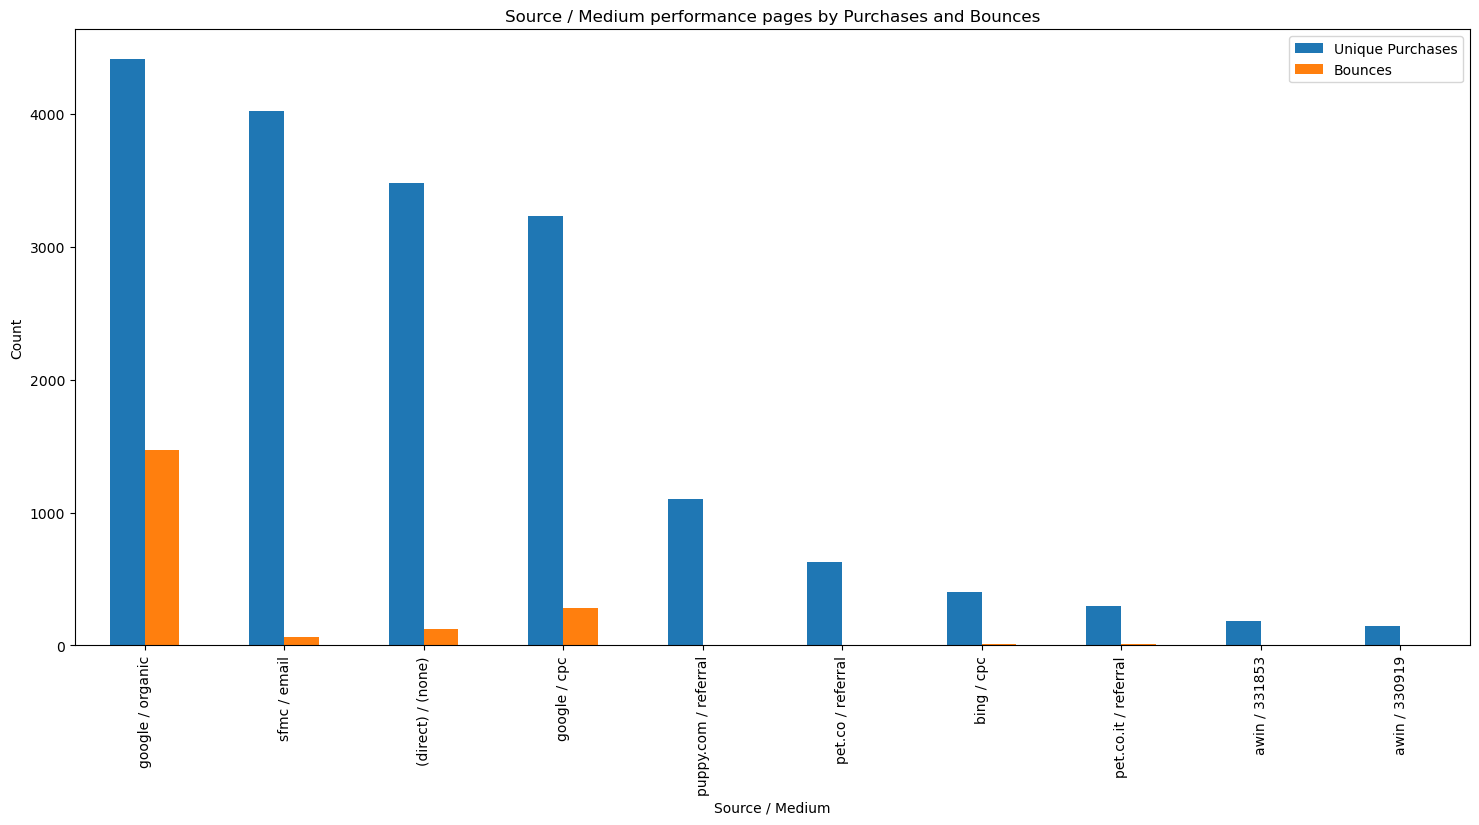

In [24]:
purc_bounces = traffic.groupby('Source / Medium').agg({'Unique Purchases': 'sum', 'Bounces': 'mean'}).sort_values(by='Unique Purchases', ascending=False)

purc_bounces[['Unique Purchases', 'Bounces']][:10].plot.bar(figsize=(18, 8))

# Set the x-axis label
plt.xlabel('Source / Medium')

# Set the y-axis label
plt.ylabel('Count')

# Set the title of the plot
plt.title('Source / Medium performance pages by Purchases and Bounces')

# Show the plot
plt.show();

##### Purchases and Bounces

In this barchart we want to make a final check on what are the channels that bring most purchases but at the same time we have bounces. 
The Bounces are calculated by multiplying the bounce rate for the number of sesssions, in order to have an idea of what is the real number of people that are not interested.

- Not surprisingly we see that the channel that brings most traffic is also the one that has a higher number of bounce users. Even tho it's the higher in importance for purhcases there are still a high number of people that land on our website and then leave since they are not interested.

- A key point to focus is the email marketing channel. In fact, it's the second most important transaction speaking but it has a very low number of bounces meaning that these users seem engaged with the email and tend to capture the message and buy products. Even more these people are also loya customers since it's not the first time they buy from us (receiving email are only for those who have already purchased a product from us). We should focus on retargeting these users also across other channels and cluster them in order to keep them engaged with out store.

- The direct traffic also plays a pivotal role since it's free traffic and really engaged and we also need to focus on PPC activitis since it represents the second channel in terms of bounces. This means that there are some keywords that are not very effective and we need to investigate more.

# STEP 6: ACT

In this part we summarize the key insights we have found and we elaborate them into an actionable plan

Here, we revisit our business questions and share with you our high-level business recommendations.
 
**1. What are the main stream of revenues for our e-commerce?**

* The majority of revenues that we generate come from the organic channel, this means that we keep continue to invest into the SEO activities since they are the primary source of conversions, trying also to lower bounces with more quality content.

* A rising channel is the email marketing channel; in fact it shows that most of traffic coming from this channel has a higher conversion rate and a very low bounce rate. We need to develop this channel since it's the best source of traffic in terms of low bounces, we then need to gather more customer data and leverage them with engaging newsletters. 

**2. How our e-commerce is performing in terms of profitability?**

* We do not have in this dataframe a cost structure. However we know that the revenues are decreasing over time, this may be reflected in a lower investment into paid media activities or we are decreasing email marketing activities. It's important to be active in promotions during low performance periods and engaging users across different platforms such as paid search but also social and paid social activities.

**3. How could these trends can impact marketing strategy?**

* We need to create quality content in order for the orgnic traffic to redure the number of sessions and increase the revenue stream and conversions. This means that we increase the conversion rate of our website for all the organic traffic. Promotions as well as an engaging blog or community may be the best choice, furthermore reviewing the cpc keywords can also be a complementary activity since we are spending money for people we don't convert. Therefore could be a possible strategy to retarget people that landend on our website through organic or paid search ativity and display them banners on social or thorugh display and video ads on the web.


***

